# **Credit Card Fraud Detection DATASET**

# . lien du dataset :

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

# . Description du dataset

Le dataset Credit Card Fraud Detection contient des transactions de cartes bancaires européennes réalisées sur deux jours.
Il est très utilisé pour les exercices de classification binaire et la détection de fraudes.
Le dataset est déséquilibré, car les fraudes représentent une petite fraction des transactions totales.
Toutes les caractéristiques sont anonymisées (V1, V2, … V28) pour protéger la confidentialité, sauf Time et Amount qui sont explicites.

# . Objectif principal

L’objectif principal est de détecter les transactions frauduleuses.
Autrement dit, il s’agit d’un problème de classification supervisée binaire :

prédire si une transaction est frauduleuse ou non frauduleuse à partir des caractéristiques de la transaction.

# . Contenu du dataset

Le dataset contient plusieurs colonnes :

Time : temps écoulé depuis la première transaction.

V1 à V28 : caractéristiques anonymisées issues d’une transformation PCA pour confidentialité.

Amount : montant de la transaction.

Class : variable cible indiquant si la transaction est frauduleuse ou non.

# . Variable cible

La variable cible est Class :

0 = transaction normale (non frauduleuse)

1 = transaction frauduleuse

Le dataset est déséquilibré, avec beaucoup plus de transactions normales que de fraude

# . chargement des bibleotheques :

In [1]:
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Prétraitement et ML
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **Partie 1 — DATA CLEANING**

In [8]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(1081)

In [10]:
num_duplicates = df.duplicated().sum()
print(f"Nombre de lignes dupliquées : {num_duplicates}")

Nombre de lignes dupliquées : 1081


In [11]:
df = df.drop_duplicates()

# Vérification après suppression
print("Taille après suppression :", df.shape)

Taille après suppression : (283726, 31)


In [12]:
print("Nombre de doublons restants :", df.duplicated().sum())


Nombre de doublons restants : 0


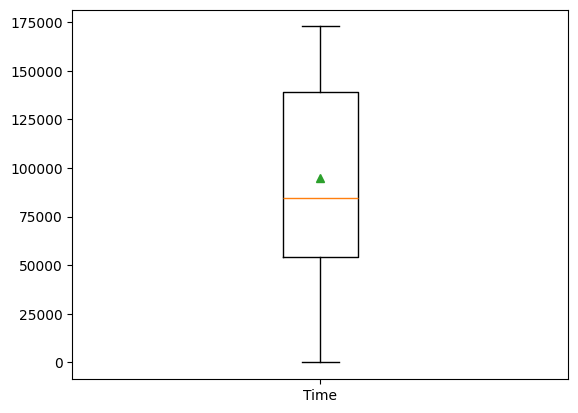

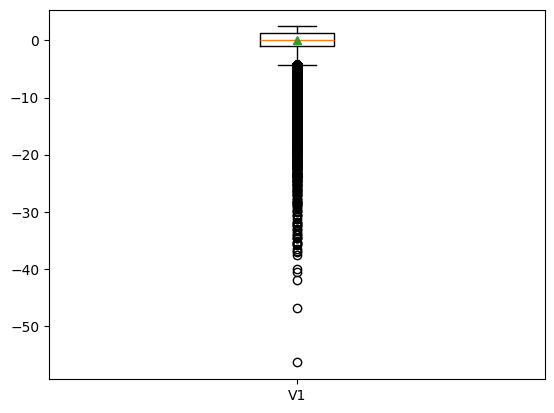

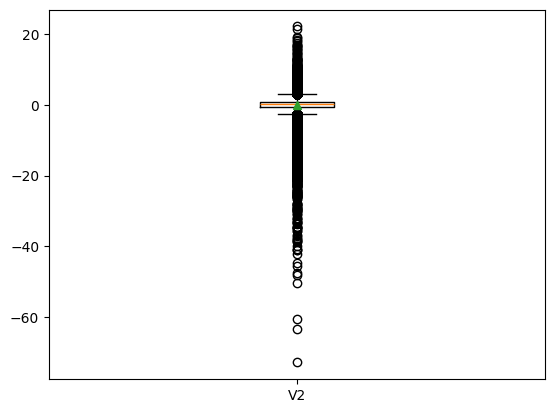

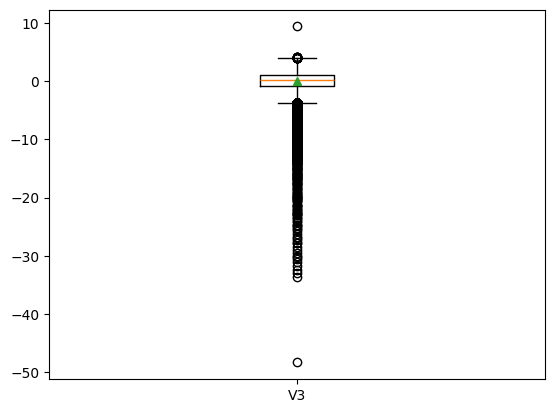

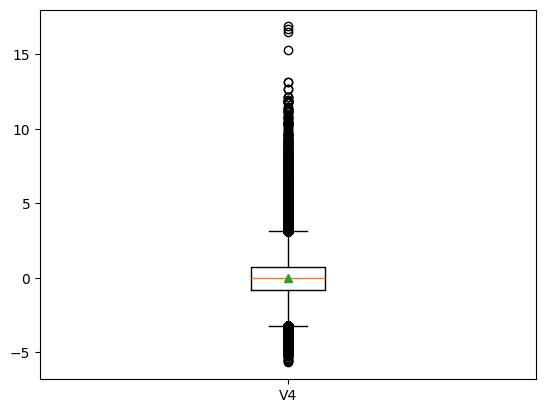

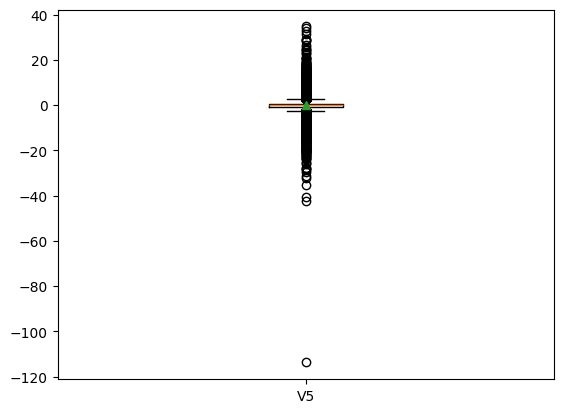

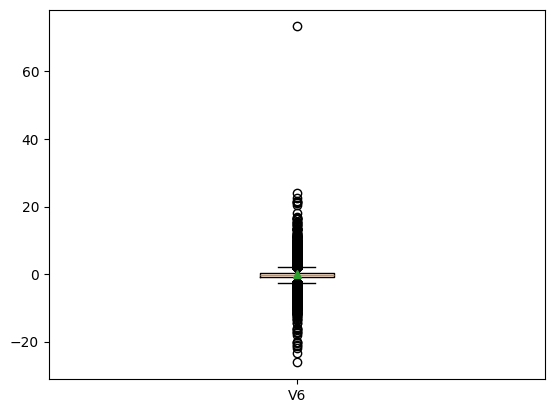

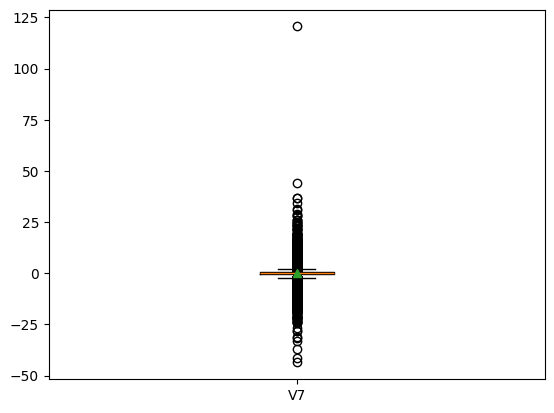

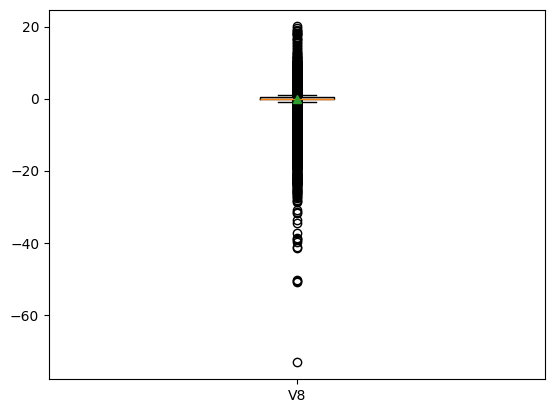

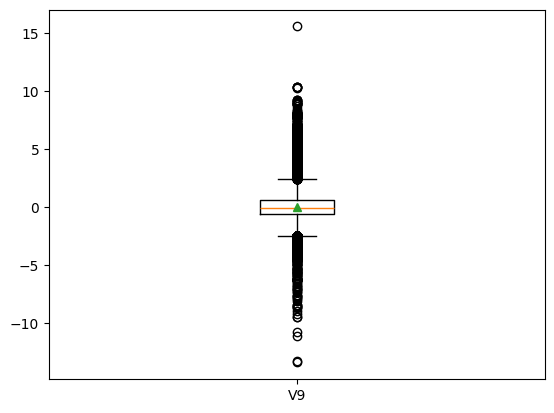

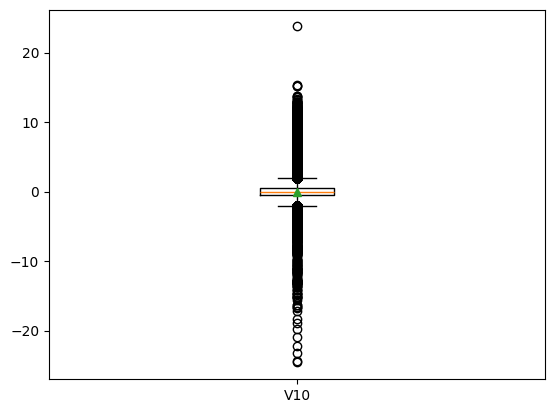

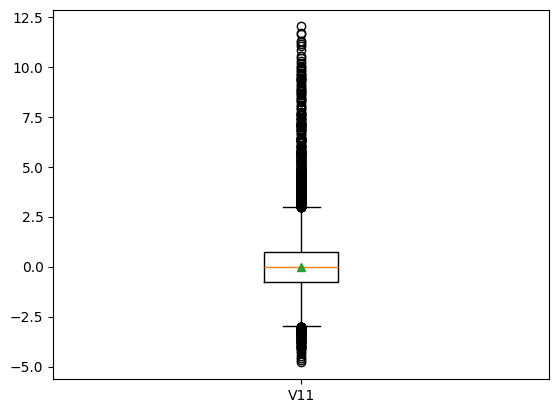

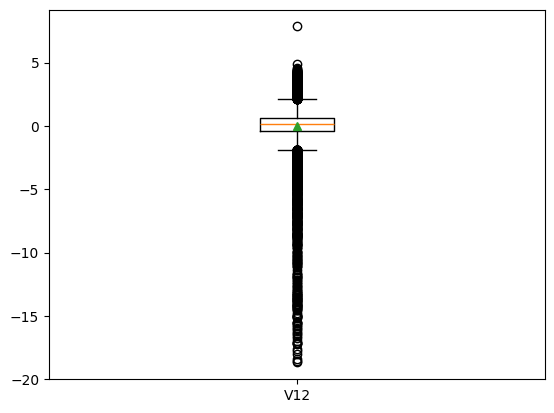

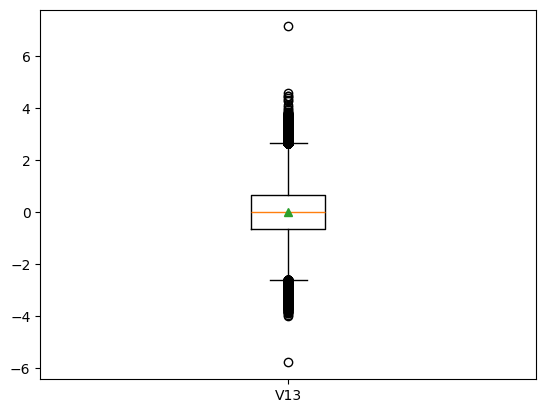

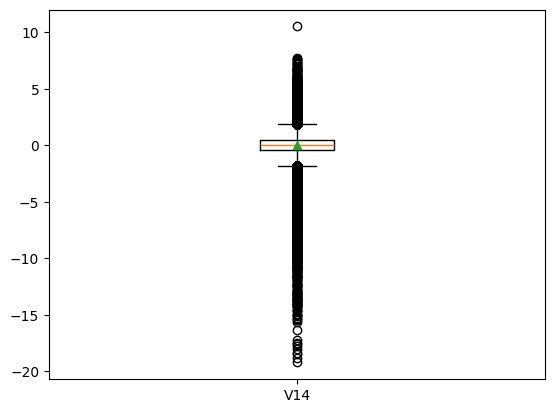

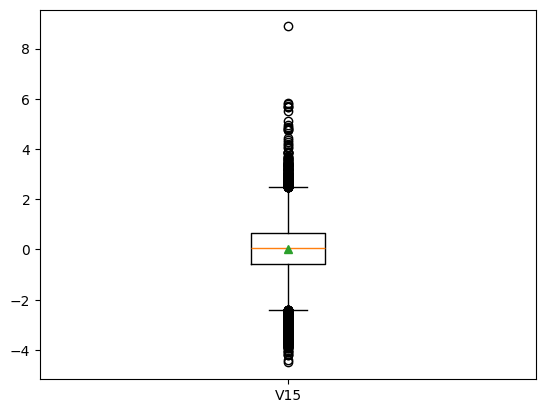

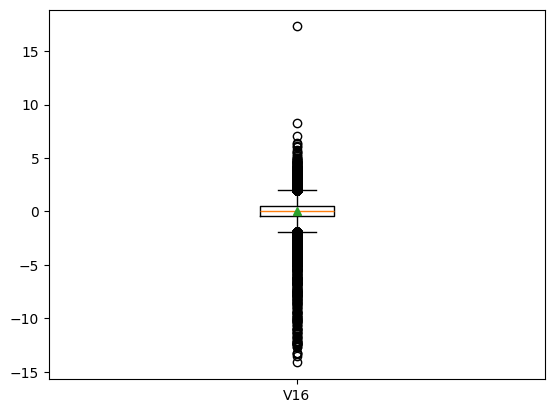

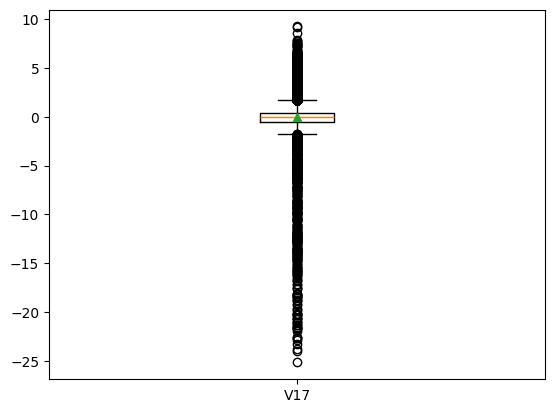

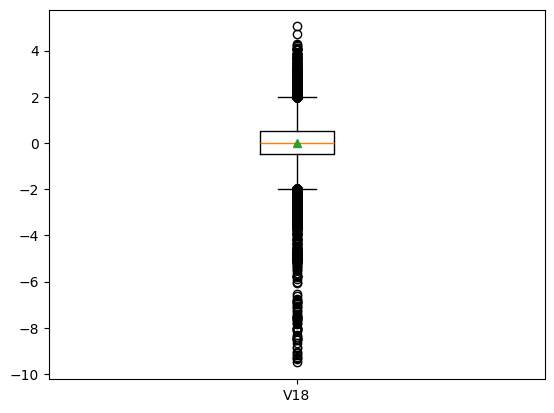

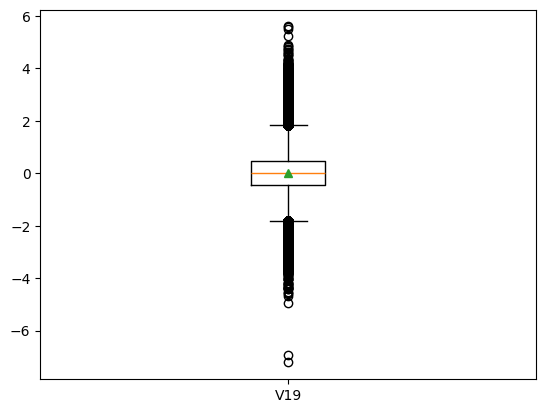

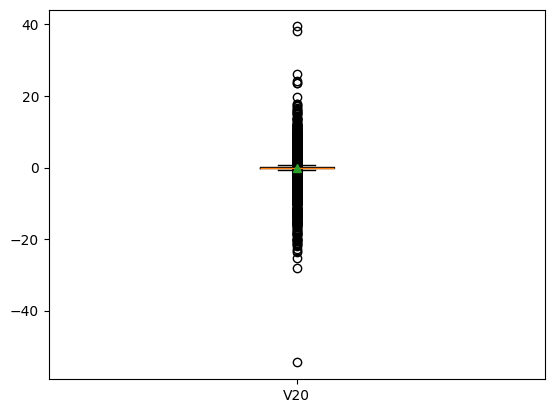

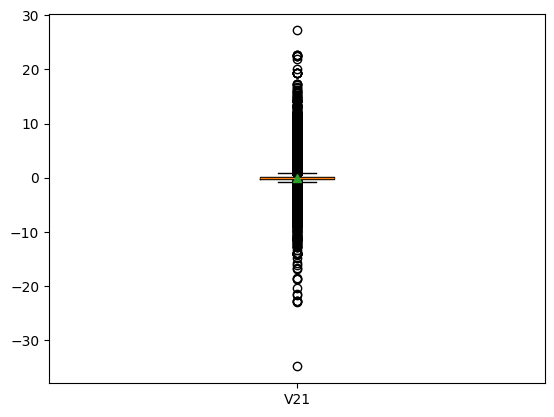

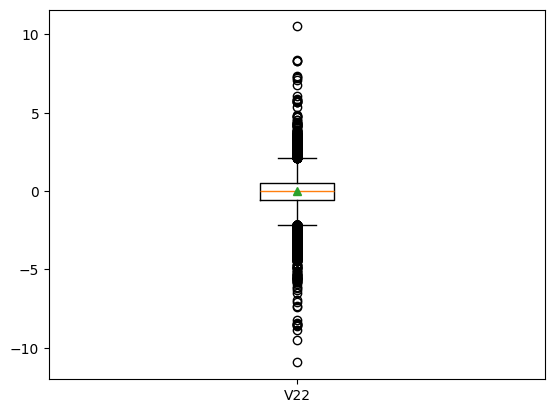

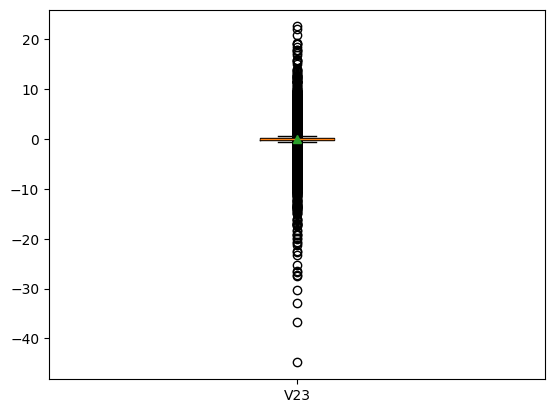

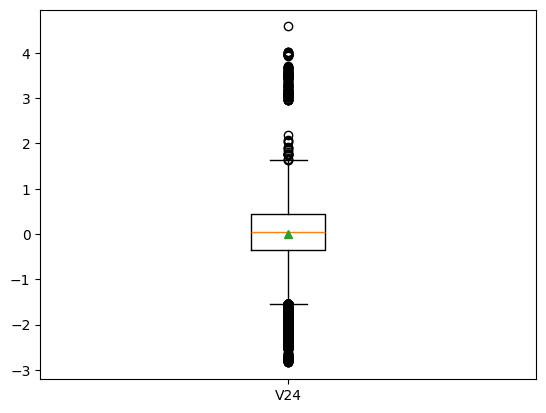

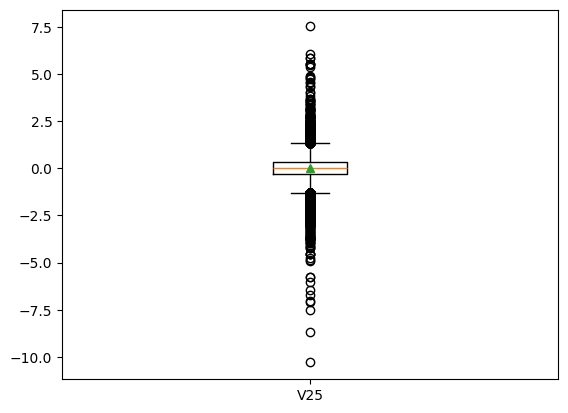

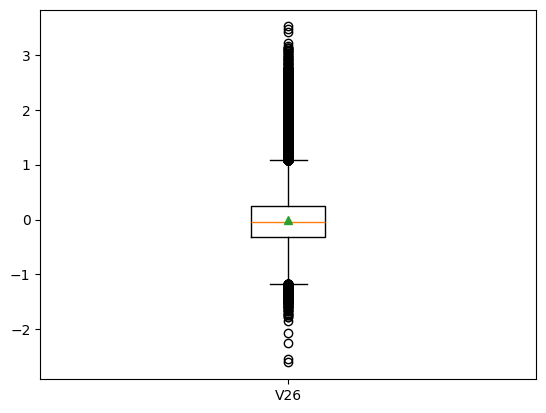

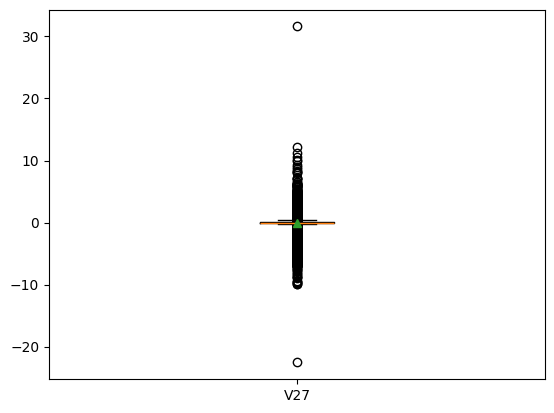

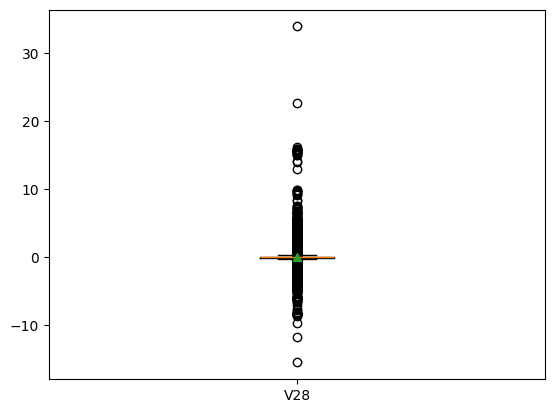

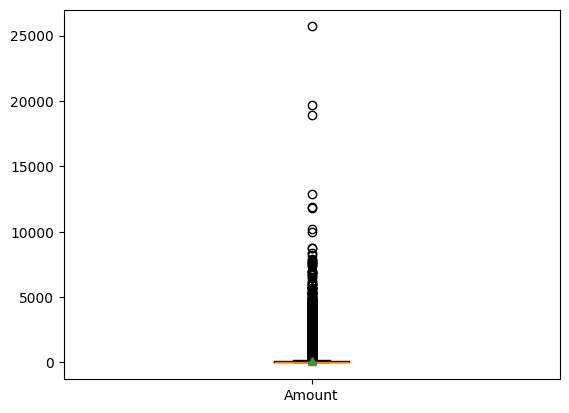

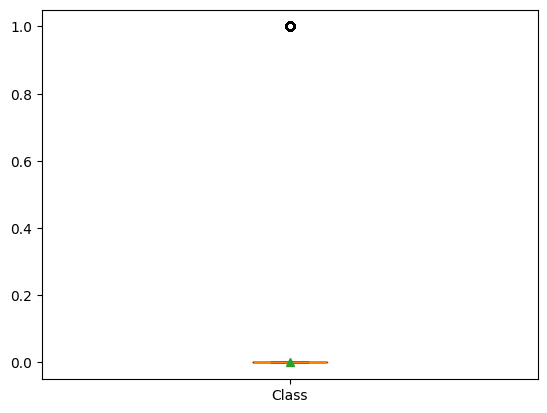

In [13]:
exclude_bool= df.select_dtypes(exclude=['object'])

for col in exclude_bool.columns:
    plt.boxplot([df[col]],tick_labels=[col], showmeans=True)
    plt.show()

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

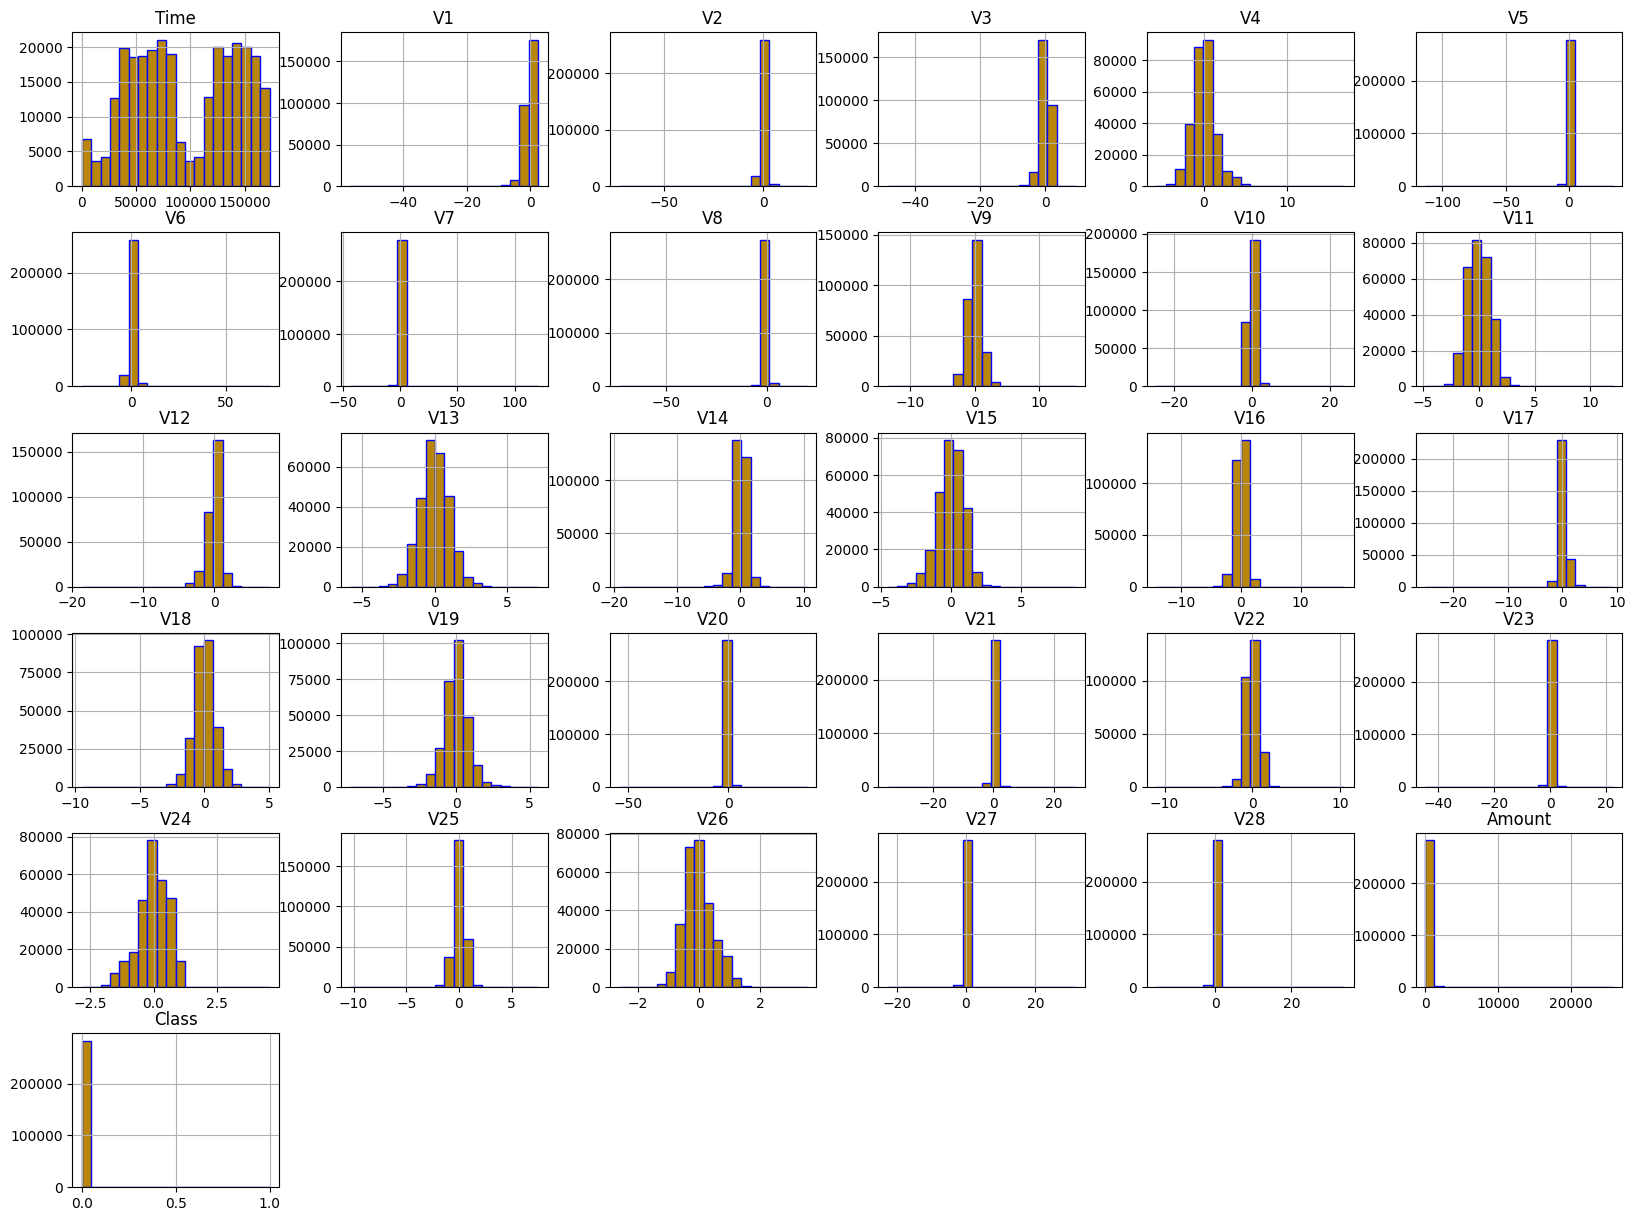

In [14]:
df.hist(bins=20,figsize=(20,15),color='#B8860B',edgecolor='b')

Class
0    283253
1       473
Name: count, dtype: int64


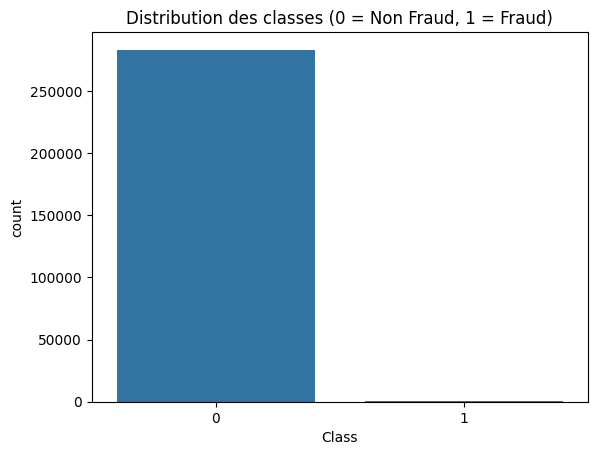

In [15]:
# Distribution des classes

print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title("Distribution des classes (0 = Non Fraud, 1 = Fraud)")
plt.show()

In [16]:
# Séparer features / target

X = df.drop("Class", axis=1)
y = df["Class"]


In [17]:
# Normalisation des features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Partie 2 — MACHINE LEARNING**

In [18]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42)

In [19]:
# Définir les modèles

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# **Logistic Regression**

In [20]:
model1= LogisticRegression(max_iter=1000)
model1.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## prediction 

In [21]:
y_pred_1= model1.predict(X_test)

# **accuracy**

Accuracy: 1.00


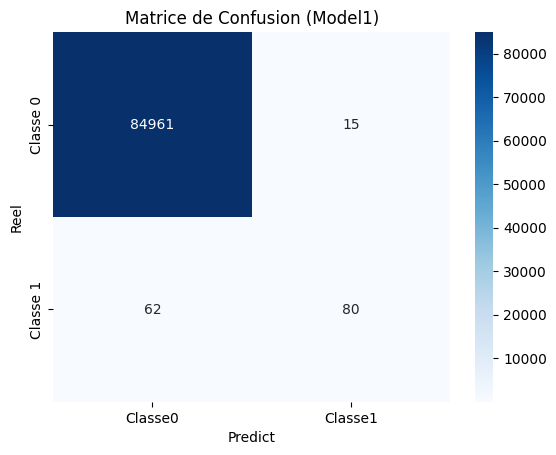

In [22]:
# Accuracy du modèle
accuracy = accuracy_score(y_test, y_pred_1)
print(f"Accuracy: {accuracy:.2f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe0', 'Classe1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Reel')
plt.title('Matrice de Confusion (Model1)')
plt.show()

# **la courbe roc**

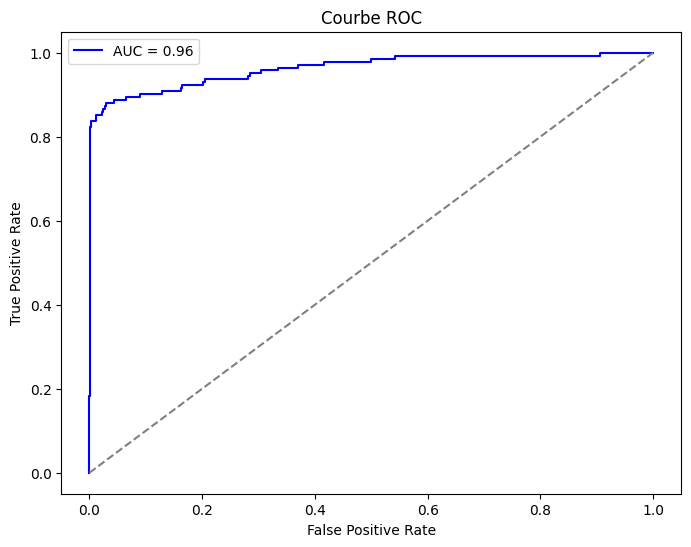

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Calcul de la courbe ROC
y_scores = model1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

# **classification report**

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.84      0.56      0.68       142

    accuracy                           1.00     85118
   macro avg       0.92      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118



# **KNN**

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

## prediction 

In [26]:
y_pred_knn= knn.predict(X_test)

# **accuracy et matrice de confusion**

Accuracy: 1.00


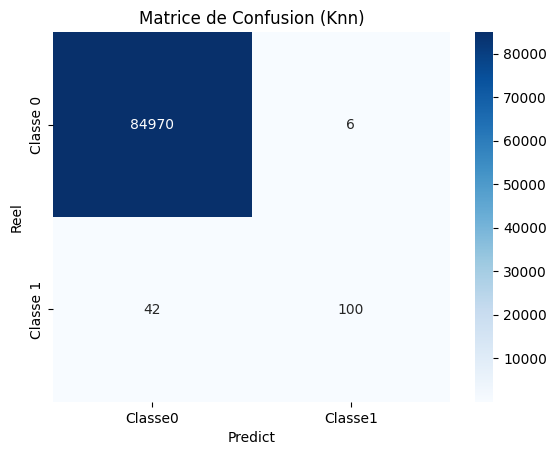

In [27]:
# Accuracy du modèle
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.2f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe0', 'Classe1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Reel')
plt.title('Matrice de Confusion (Knn)')
plt.show()

# **la courbe ROC**

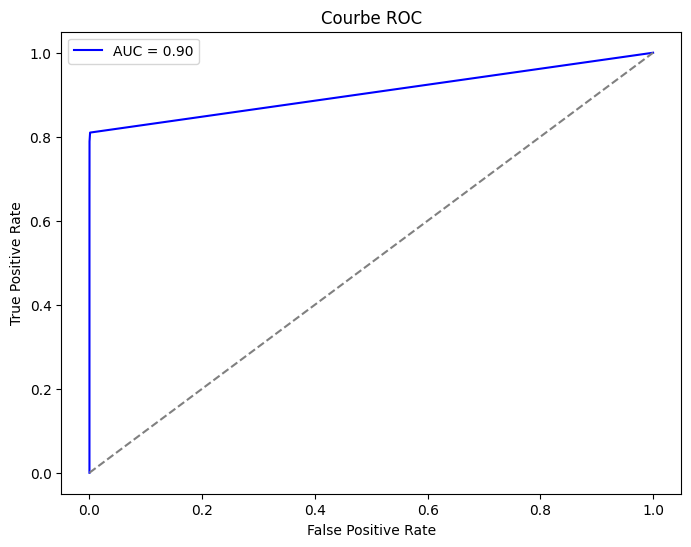

In [28]:
# Calcul de la courbe ROC
y_scores = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

# **classification report**

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.94      0.70      0.81       142

    accuracy                           1.00     85118
   macro avg       0.97      0.85      0.90     85118
weighted avg       1.00      1.00      1.00     85118



# **arbre de decision**

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(criterion="gini", max_depth=7, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

## prediction 

In [31]:
y_pred_dt= dt.predict(X_test)

## affichage de l'arbre

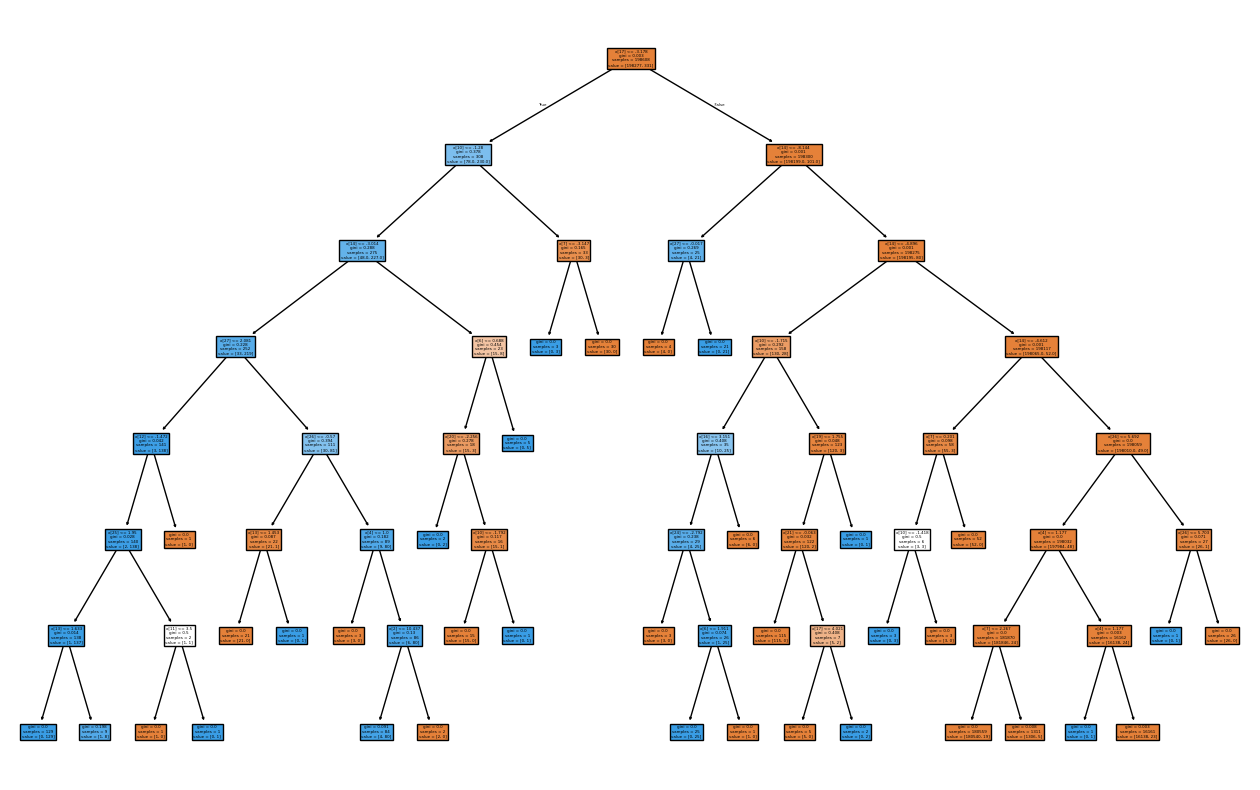

In [32]:
plt.figure(figsize=(16, 10))
plot_tree(dt, filled=True)
plt.show()

# **accuracy et matrice de confusion**

Accuracy: 1.00


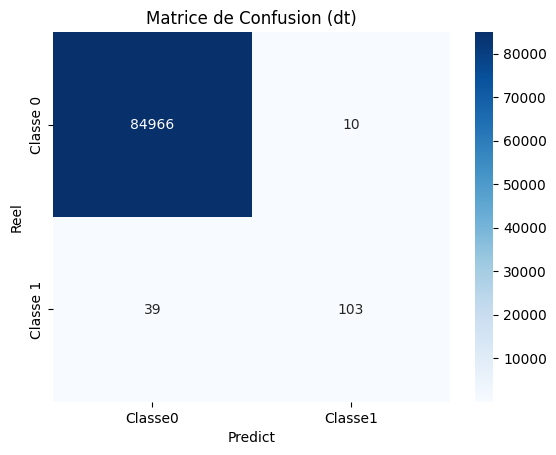

In [33]:
# Accuracy du modèle
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.2f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe0', 'Classe1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Reel')
plt.title('Matrice de Confusion (dt)')
plt.show()

# **La courbe ROC**

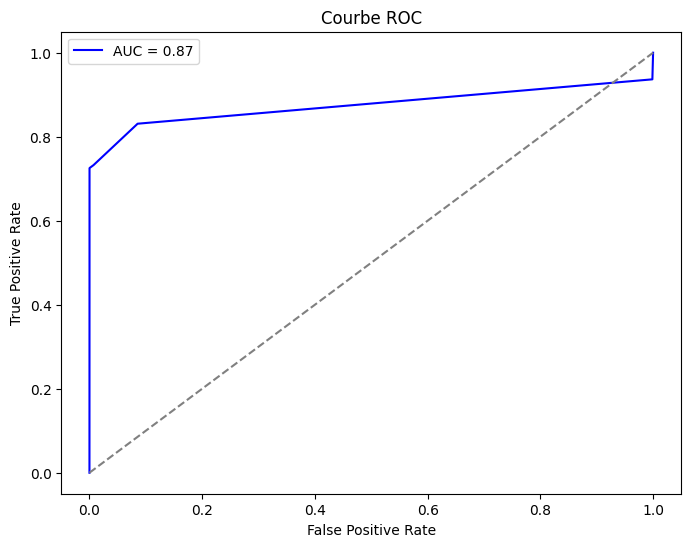

In [34]:
# Calcul de la courbe ROC
y_scores = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

# **classification report**

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.91      0.73      0.81       142

    accuracy                           1.00     85118
   macro avg       0.96      0.86      0.90     85118
weighted avg       1.00      1.00      1.00     85118



# **random forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## prediction 

In [37]:
y_pred_rf = rf.predict(X_test)

Accuracy: 1.00


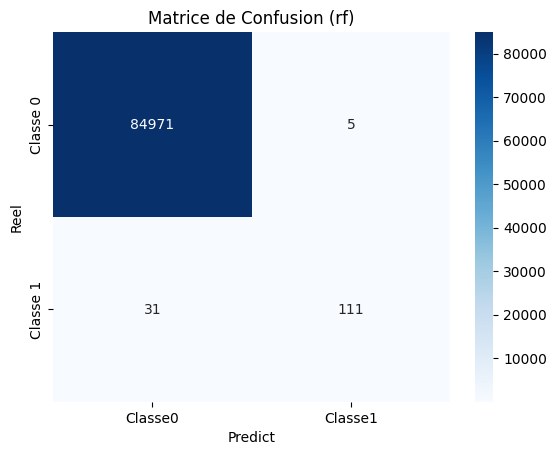

In [38]:
# Accuracy du modèle
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe0', 'Classe1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Reel')
plt.title('Matrice de Confusion (rf)')
plt.show()

## la courbe ROC

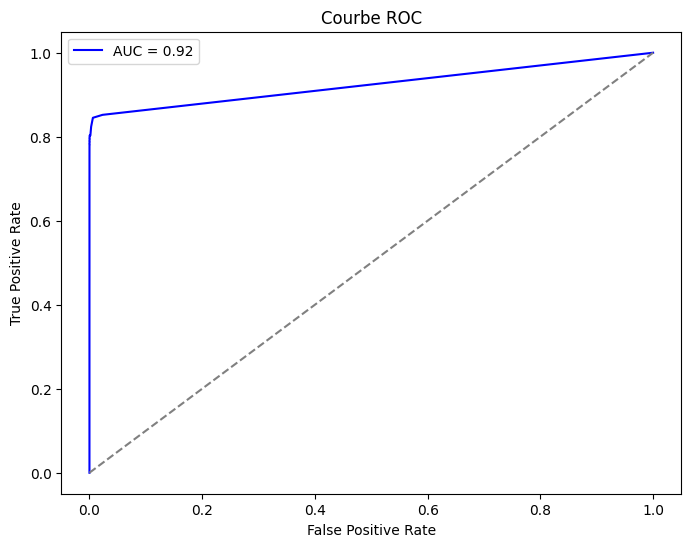

In [39]:
# Calcul de la courbe ROC
y_scores = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

## classification report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.78      0.86       142

    accuracy                           1.00     85118
   macro avg       0.98      0.89      0.93     85118
weighted avg       1.00      1.00      1.00     85118



In [41]:
from sklearn.svm import SVC

svc= SVC(kernel='rbf')
svc.fit(X_train,y_train)

SVC()

## prediction

In [42]:
y_pred_svc= svc.predict(X_test)

Accuracy: 1.00


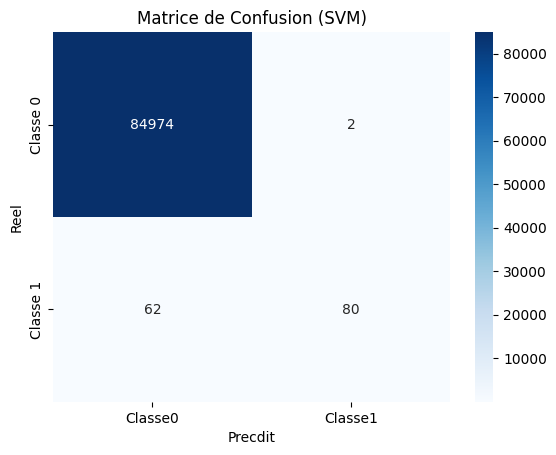

In [43]:
# Accuracy du modèle
accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy: {accuracy:.2f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe0', 'Classe1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Precdit')
plt.ylabel('Reel')
plt.title('Matrice de Confusion (SVM)')
plt.show()

## classification report

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.98      0.56      0.71       142

    accuracy                           1.00     85118
   macro avg       0.99      0.78      0.86     85118
weighted avg       1.00      1.00      1.00     85118



# **Comparaison des models**

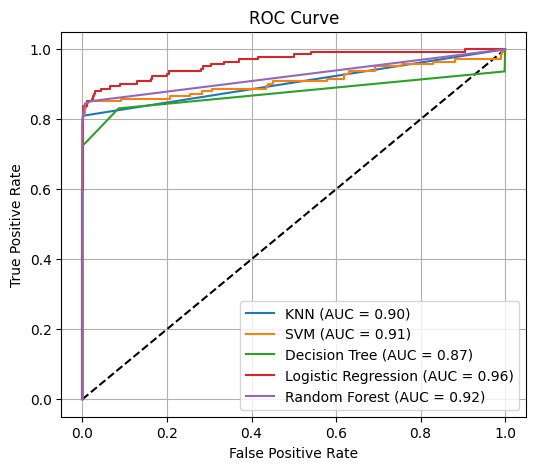

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(model1, x_test, y_test, title):
    if hasattr(model1, "predict_proba"):
        y_prob = model1.predict_proba(x_test)[:, 1]
    else:
        y_prob = model1.decision_function(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{title} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

# Affichage ROC
plt.figure(figsize=(6, 5))
plt.plot([0, 1], [0, 1], "k--")
plot_roc(knn, X_test, y_test, "KNN")
plot_roc(svc, X_test, y_test, "SVM")
plot_roc(dt, X_test, y_test, "Decision Tree")
plot_roc(model1, X_test, y_test, "Logistic Regression")
plot_roc(rf,X_test, y_test, "Random Forest")
plt.grid()
plt.show()

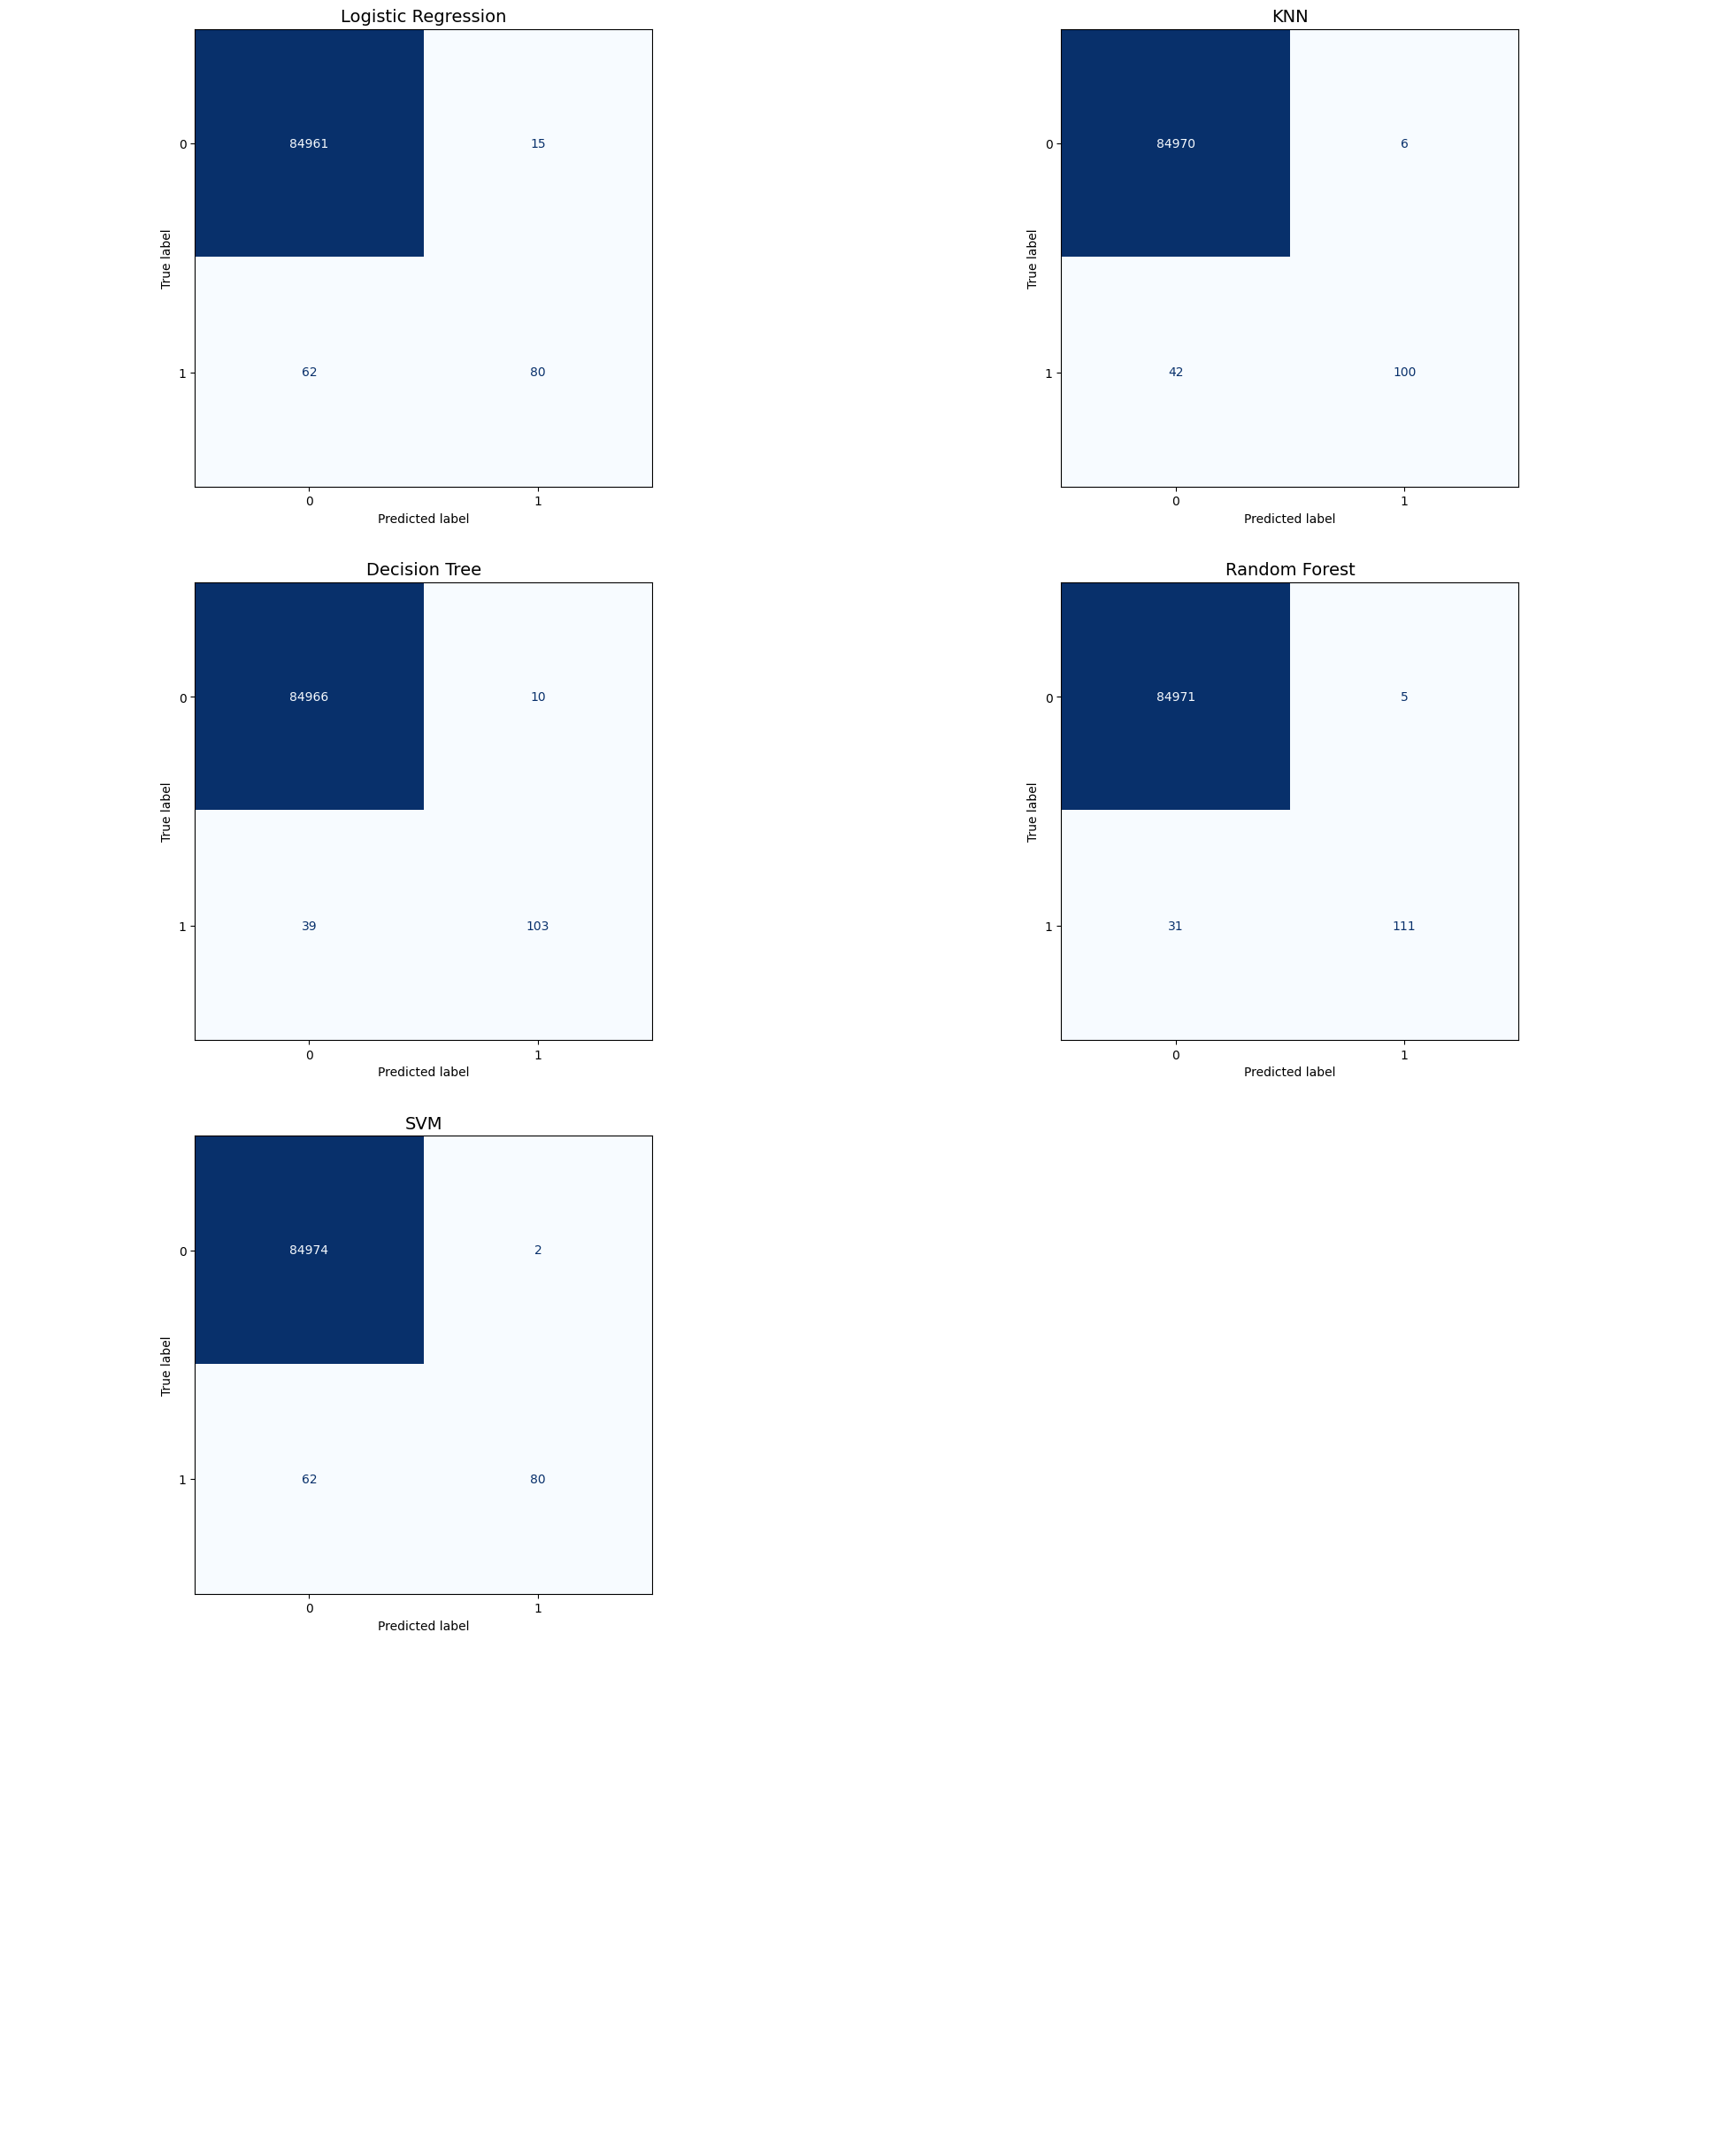

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred_1)
cm2 = confusion_matrix(y_test, y_pred_knn)
cm3 = confusion_matrix(y_test, y_pred_dt)
cm4 = confusion_matrix(y_test, y_pred_rf)
cm5 = confusion_matrix(y_test, y_pred_svc)

# Tes données
cms = [cm1, cm2, cm3, cm4, cm5]
titles = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']

# Préparer la figure
fig, axes = plt.subplots(4, 2, figsize=(20, 25))  # 4 lignes, 2 colonnes
axes = axes.flatten()

for i, (cm, title) in enumerate(zip(cms, titles)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(title, fontsize=14)

# Si il reste des cases vides, on les désactive
for j in range(len(cms), len(axes)):
    axes[j].axis('off')

plt.tight_layout(pad=3.0)
plt.show()
